In [104]:
import pyworld
import kaldiio.python_wave as wave
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

In [118]:
def get_audio_graph(fd: str, s=1):
    wd = wave.open(fd)
    rate = wd.getframerate()
    data = wd.readframes(wd.getnframes())
    audio = np.frombuffer(data, dtype=np.int16)

    f0, t = pyworld.harvest(
        audio.astype(np.float64),
        fs=rate,
        # f0_floor=minf0,
        # f0_ceil=maxf0,
        frame_period=10,
    )

    f0 = f0[10:700]
    t = t[10:700]

    # f0_values_clean = np.where(f0 == 0, np.nan, f0)

    x = t
    y = f0

    spl = UnivariateSpline(x, y)

    f0min = 130
    f0max = 440
    thshld = f0min * .9
    time = t
    f0_normed = f0 / f0max
    spliner = UnivariateSpline(time, f0_normed, s=s)
    f0_smoothened = spliner(time)
    time_interval = time[1] - time[0]

    f0_fluc = [0]
    f0_fluc_ori = [0]

    for i in range(1, len(f0_smoothened)):
        fluc = 0
        # if (f0[i] < thshld or f0[i-1] < thshld):
        #     fluc = 0
        # else:
        fluc = (f0_smoothened[i] - f0_smoothened[i-1]) / time_interval
        f0_fluc.append(fluc)

        fluc_ori = (f0_normed[i] - f0_normed[i-1]) / time_interval
        f0_fluc_ori.append(fluc_ori)

    f0_fluc = np.array(f0_fluc)
    f0_fluc_ori = np.array(f0_fluc_ori)

    f0_diff = []
    for i in range(len(f0_smoothened)):
        fluc = 0

        fluc = f0_normed[i] - f0_smoothened[i]
        f0_diff.append(fluc)
    
    # plt.plot(x, f0_fluc_ori, 'b', lw=3)
    return x, f0_diff, f0_normed

In [119]:
fd = "/media/amogus/D/SVCC/serenade/egs/gtsinger/ssc1/downloads/smol2/train/english/English/EN-Tenor-1/Vibrato/song1/Vibrato_Group/0000.wav"
fd2 = "/media/amogus/D/SVCC/serenade/egs/gtsinger/ssc1/downloads/smol2/train/english/English/EN-Tenor-1/Breathy/song1/Breathy_Group/0000.wav"
fd3 = "/media/amogus/D/SVCC/serenade/egs/gtsinger/ssc1/downloads/smol2/train/english/English/EN-Tenor-1/Breathy/song1/Control_Group/0000.wav"

s=10

x, y1, ya1 = get_audio_graph(fd,s)
x, y2, ya2 = get_audio_graph(fd2,s)
x, y3, ya3 = get_audio_graph(fd3,s)

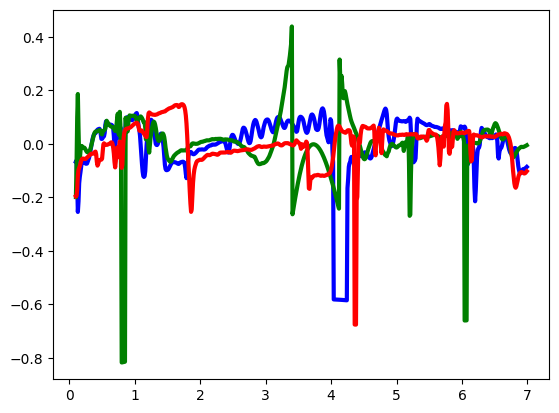

In [120]:
# plt.plot(x, ya1, 'bs', lw=3)
plt.plot(x, y1, 'b', lw=3)
# plt.plot(x, ya2, 'gs', lw=3)
plt.plot(x, y2, 'g', lw=3)
# plt.plot(x, ya3, 'rs', lw=3)
plt.plot(x, y3, 'r', lw=3)

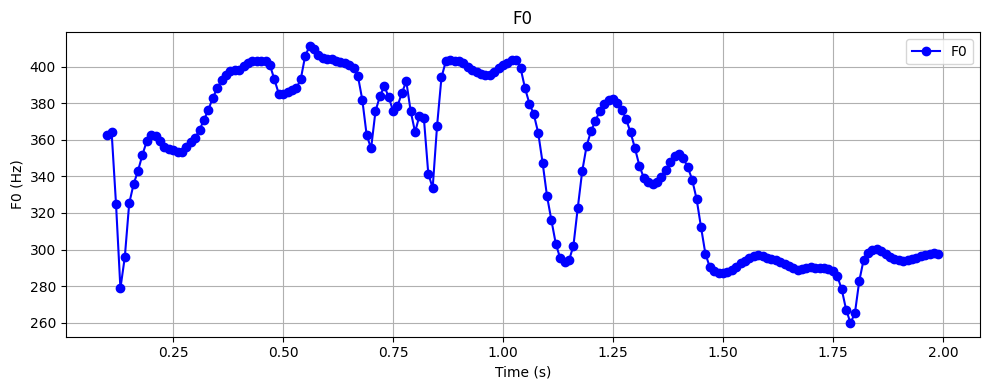

In [ ]:
# Plot the F0 contour
# plt.figure(figsize=(10, 4))
# plt.plot(t, f0_values_clean, marker='o', label="F0", color='blue')
# plt.title("F0")
# plt.xlabel("Time (s)")
# plt.ylabel("F0 (Hz)")
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()



[ 0.03849822  0.75325283  0.87232852 -0.22571218 -0.92325368 -0.48534171
  0.27506941  1.07832725  0.62598347 -0.51388797]
[ 0.3048873   0.52816096  0.32283195 -0.05790735 -0.36086459 -0.33284738
  0.14594663  0.66175975  0.6674443  -0.38414741]


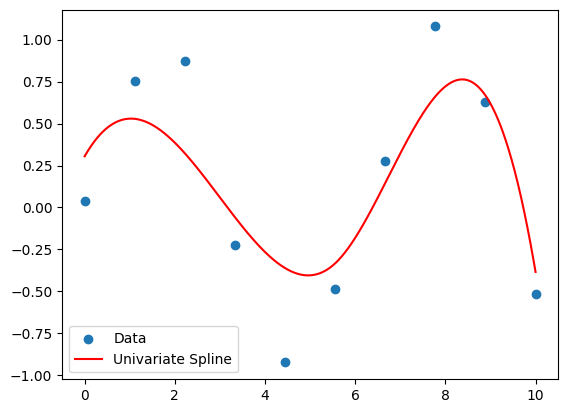

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.interpolate import UnivariateSpline

# # Sample data
# x = np.linspace(0, 10, 10)
# y = np.sin(x) + np.random.normal(scale=0.1, size=x.shape)

# # Fit a smoothing spline
# spline = UnivariateSpline(x, y, s=1)  # s is the smoothing factor

# # Evaluate the spline
# x_dense = np.linspace(0, 10, 1000)
# y_spline = spline(x_dense)

# # Plot
# plt.scatter(x, y, label='Data')
# plt.plot(x_dense, y_spline, label='Univariate Spline', color='red')
# plt.legend()

# # spline.set_smoothing_factor(0.5)
# # y_spline = spline(x_dense)
# # plt.plot(x_dense, y_spline, 'b', lw=3)

# # spline.set_smoothing_factor(0.001)
# # y_spline = spline(x_dense)
# # plt.plot(x_dense, y_spline, 'g', lw=3)
# # plt.show()

# print(y)
# print(spline(x))